# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
####This 
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import random
from numpy import linalg as LA

In [2]:
####This 
# (a) Load data (features)
#mean0
#std0
def load_data(npyfile):
    dataFromFile = np.load(npyfile)
    normal = np.linalg.norm(dataFromFile)
    samples, feature = dataFromFile.shape
    normlist = []
    Meanlist = []
    for feat in range(feature):
        mean = np.mean(dataFromFile[:,feat])
        std = np.std(dataFromFile[:,feat])
        featureVector = dataFromFile[:,feat]
        NormMean0Std1 = (featureVector-mean)*(1/std)
        NormMeanDataV1 = (featureVector-mean)
        print(round(np.mean(NormMean0Std1),10))
        print(round(np.std(NormMean0Std1),10))
        NormList = NormMean0Std1.tolist()
        NormMeanDataV2 = NormMeanDataV1.tolist()
        Meanlist.append(NormMeanDataV2)
        normlist.append(NormList)
    
    NormMeanData = np.transpose(np.array(Meanlist))
    NormMatrixTranspose = np.array(normlist)
    NormFinal = np.transpose(NormMatrixTranspose)
    print(NormFinal.shape)
    data = NormFinal
    NonNormData = dataFromFile
    return data, NormMeanData, NonNormData

feat, NormMeanData, NonNormData = load_data("features.npy")

-0.0
1.0
-0.0
1.0
0.0
1.0
-0.0
1.0
0.0
1.0
0.0
1.0
-0.0
1.0
-0.0
1.0
(150, 8)


In [3]:
###new this
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(feat):
    samples, features = feat.shape
    featT = np.transpose(feat)
    Co = np.cov(featT)
    eiganValues, eiganVectors = LA.eig(Co)
    sorted_eig_vals = eiganValues 
    sorted_eig_vecs = eiganVectors
    CoMatrix = np.diag(sorted_eig_vals)
    print(sorted_eig_vals)
    print(sorted_eig_vecs)
    print(Co)
    print(CoMatrix)
    return (sorted_eig_vals, sorted_eig_vecs)

EiganValues,EiganVectors = eigendecomp(feat)

[ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02 -1.75243456e-16  2.86910531e-16 -5.44809950e-17]
[[-0.39124937  0.13884872 -0.46160937  0.58034539  0.24934936 -0.40069986
  -0.02256515  0.18043453]
 [ 0.11687696 -0.4391715  -0.78711289 -0.2905579  -0.12725786  0.01138973
   0.13157531  0.17592915]
 [-0.40655289  0.29080021 -0.13961871 -0.12636707 -0.54994554 -0.0053785
   0.38948762 -0.26576102]
 [-0.39944906  0.26454833 -0.16206048 -0.54404218  0.49904279  0.35157176
  -0.37925083 -0.36099212]
 [-0.3778555  -0.35426671  0.07790627  0.42060984  0.12822569  0.6296306
   0.03545723 -0.28352169]
 [-0.09816172 -0.64299795  0.11941452 -0.04972667 -0.0795516  -0.03130771
  -0.36166983 -0.48358818]
 [-0.45509399 -0.03231459  0.12200908 -0.08034689 -0.51935676  0.00592791
  -0.42927385  0.29290856]
 [-0.38587285 -0.30545597  0.29393481 -0.28457653  0.27864817 -0.56411724
   0.6085299   0.57923275]]
[[ 1.00671141 -0.11010327  0.87760486  0.82344326  0.61123001 

(8, 8)
[ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02 -1.75243456e-16  2.86910531e-16 -5.44809950e-17]
k = 1 Ei: 4.742989609365717 Variance: 0.5889212098295771
k = 2 Ei: 2.2958530862227136 Variance: 0.873989634702231
k = 3 Ei: 0.7769105123670551 Variance: 0.9704560233211404
k = 4 Ei: 0.2041729011616391 Variance: 0.9958074918820439
k = 5 Ei: 0.033765166050653564 Variance: 1.0
k = 6 Ei: -1.7524345641154058e-16 Variance: 1.0
k = 7 Ei: 2.869105305177416e-16 Variance: 1.0
k = 8 Ei: -5.448099503364864e-17 Variance: 1.0


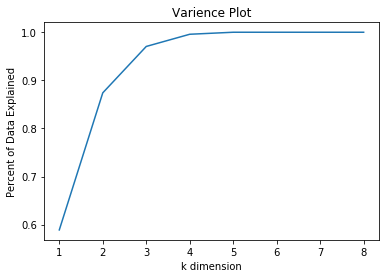

In [4]:
# (c) Evaluate using variance_explained as the metric
def eval(EiganVectors, EiganValues, feat):
    print(EiganVectors.shape)
    print(EiganValues)
    totvar = np.sum(EiganValues)
    samples,features = feat.shape
    dimensionlist = []
    varlist = []
    klist = []
    for feats in range(features):
        klist.append(feats+1)
        dimensionlist.append(EiganValues[feats])
        print("k = "+str(feats+1)+" Ei: "+str(EiganValues[feats])+" Variance: "+str((np.sum(np.array(dimensionlist)))/totvar))
        varlist.append((np.sum(np.array(dimensionlist)))/totvar) 

    #print(varlist)
    plt.plot(klist,varlist)
    plt.xlabel("k dimension")
    plt.ylabel("Percent of Data Explained")
    plt.title("Varience Plot")
    plt.show()
    
eval(EiganVectors, EiganValues, feat)

#I would use k = 2 as it explains 87.4% of the data
    

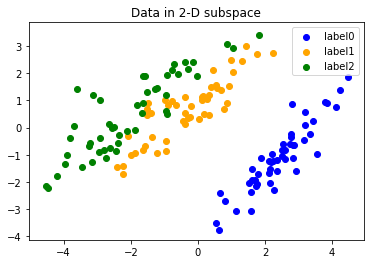

In [5]:
# (d) Visualize after projecting to 2-D space

Matrix = feat@EiganVectors
def viz(Matrix):
    D2feat = Matrix
    label0 = D2feat[1:50,0]
    label1 = D2feat[51:100:,0]
    label2 = D2feat[101:150:,0]
    y0 = D2feat[1:50,1]
    y1 = D2feat[51:100:,1]
    y2 = D2feat[101:150:,1]

    plt.scatter(label0,y0,c="blue",label="label0")
    plt.scatter(label1,y1,c="orange",label="label1")
    plt.scatter(label2,y2,c="green",label="label2")
    plt.title("Data in 2-D subspace")
    plt.legend()
    plt.show()

viz(Matrix = Matrix)

[ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02 -1.75243456e-16  2.86910531e-16 -5.44809950e-17]
[[-0.39124937  0.13884872 -0.46160937  0.58034539  0.24934936 -0.40069986
  -0.02256515  0.18043453]
 [ 0.11687696 -0.4391715  -0.78711289 -0.2905579  -0.12725786  0.01138973
   0.13157531  0.17592915]
 [-0.40655289  0.29080021 -0.13961871 -0.12636707 -0.54994554 -0.0053785
   0.38948762 -0.26576102]
 [-0.39944906  0.26454833 -0.16206048 -0.54404218  0.49904279  0.35157176
  -0.37925083 -0.36099212]
 [-0.3778555  -0.35426671  0.07790627  0.42060984  0.12822569  0.6296306
   0.03545723 -0.28352169]
 [-0.09816172 -0.64299795  0.11941452 -0.04972667 -0.0795516  -0.03130771
  -0.36166983 -0.48358818]
 [-0.45509399 -0.03231459  0.12200908 -0.08034689 -0.51935676  0.00592791
  -0.42927385  0.29290856]
 [-0.38587285 -0.30545597  0.29393481 -0.28457653  0.27864817 -0.56411724
   0.6085299   0.57923275]]
[[ 1.00671141 -0.11010327  0.87760486  0.82344326  0.61123001 

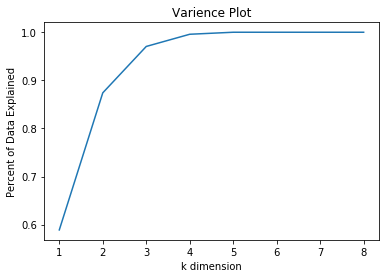

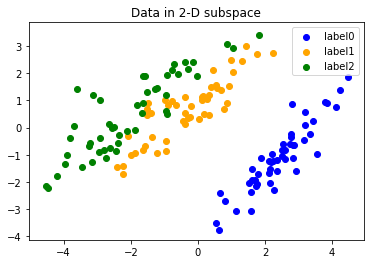

In [6]:
def main(feat):
    EiganValues,EiganVectors = eigendecomp(feat)
    eval(EiganVectors, EiganValues, feat)
    viz(Matrix=feat@EiganVectors)

if __name__ == "__main__":
    main(feat)

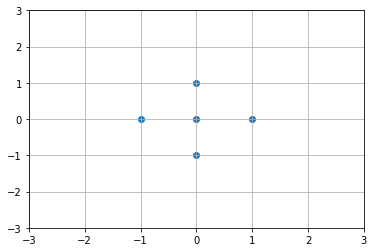

(5, 2)
[0.5 0.5]
[[1. 0.]
 [0. 1.]]
[[0.5 0. ]
 [0.  0.5]]
[[0.5 0. ]
 [0.  0.5]]
(2, 2)
[0.5 0.5]
k = 1 Ei: 0.5 Variance: 0.5
k = 2 Ei: 0.5 Variance: 1.0


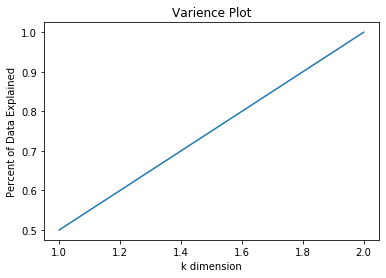

(5, 1)
[ 1.  0.  0. -1.  0.]
[0 0 0 0 0]


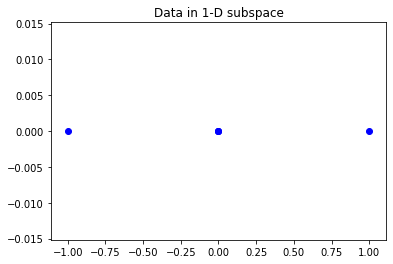

(5, 2)


In [7]:
badData = np.array([[1,0],[0,-1],[0,1],[-1,0],[0,0]])
x = badData[:,0]
y = badData[:,1]
plt.scatter(x,y)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid()
plt.show()
print(badData.shape)
EiganValues_bad,EiganVectors_bad = eigendecomp(badData)
eval(EiganVectors_bad, EiganValues_bad, badData)
k=1
dimMatrixT = []

for dim in range(k):
    dimMatrixT.append(EiganVectors_bad[dim])

dimMatrix = np.transpose(dimMatrixT)
D1feat = badData@dimMatrix
print(D1feat.shape)
label0 = D1feat[:,0]
y0 = np.array([0,0,0,0,0])
print(label0)
print(y0)
plt.scatter(label0,y0,c="blue",label="label0")
plt.title("Data in 1-D subspace")
plt.show()
print(badData.shape)